# Extract features from Data
Features to extract:
- Weekday
- Time of day
- is current time during opening ours

In [2]:
import pandas as pd
df = pd.read_csv("data/occupancy.csv")
df['time'] = pd.to_datetime(df['time'])
print(f"Read {df.size} datapoints")
df.head()

Read 1651204 datapoints


,Unnamed: 0,time,city,oerlikon
0,0,2024-01-24 16:43:08,155,140
1,1,2024-01-24 16:43:38,154,140
2,2,2024-01-24 16:45:31,163,140
3,3,2024-01-24 16:46:02,163,141
4,4,2024-01-24 16:46:32,162,143


<Axes: >

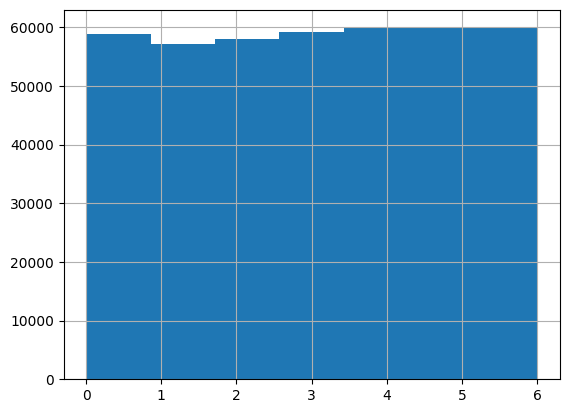

In [5]:
df['weekday'] = df['time'].dt.dayofweek
df['weekday'].hist(bins = 7)

Data looks equally distributed over the week.

In [10]:
df['minutes_since_midnight'] = df['time'].dt.hour * 60 + df['time'].dt.minute

<Axes: >

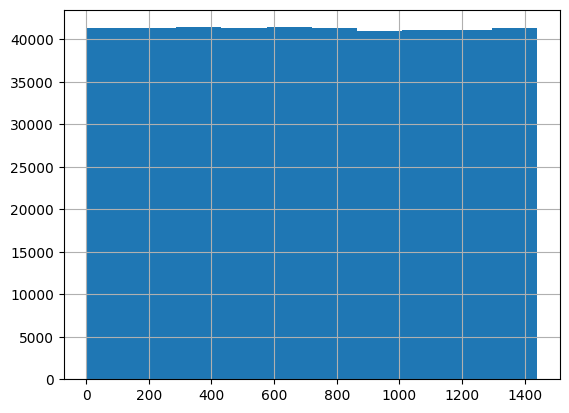

In [11]:
df['minutes_since_midnight'].hist()

We have about the same amount of data for every time of day.

In [39]:
# During opening hours
opened = (df['minutes_since_midnight'] >= 6 * 60) & (df['minutes_since_midnight'] <= 22 * 60)
df['opened'] = opened
df['opened'].value_counts()


opened
True     275277
False    137524
Name: count, dtype: int64

Ratio = 2/3. Which makes sense because 8 hours are closed and 16 are opened

In [40]:
df.head()

,Unnamed: 0,time,city,oerlikon,weekday,daytime,minutes_since_midnight,opened
0,0,2024-01-24 16:43:08,155,140,2,16:43:08,1003,True
1,1,2024-01-24 16:43:38,154,140,2,16:43:38,1003,True
2,2,2024-01-24 16:45:31,163,140,2,16:45:31,1005,True
3,3,2024-01-24 16:46:02,163,141,2,16:46:02,1006,True
4,4,2024-01-24 16:46:32,162,143,2,16:46:32,1006,True


# Write to csv again

In [42]:
df.to_csv("data/base_features.csv")